# Données

## import librairies

In [1]:
# Indispensables
import pandas as pd
import numpy as np
import geopandas as gpd
import math

# VISU
from IPython.display import Image, IFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm


import colorsys

print('Panda version: %s' % pd.__version__)
print('Numpy version: %s' % np.__version__)
print('Geo Panda version: %s' % gpd.__version__)

# general
import os
import io
import random
np.random.seed(42)
#
import time
from time import time
from datetime import datetime
#
import cv2
import csv as csv
import zipfile
print("CV2:", cv2.__version__)
print("CSV:", csv.__version__)



# Extractions JSON et fonctions "spéciales"
import json

#from extract import extract_features, extract_features2, extract_features3
#from extract import convert_coordinates, convert_coordinates2, remove_outliers

# SCIKIT-LEARN
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
# ???
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# FOLIUM
import folium
from folium import Choropleth, Circle, Marker, CircleMarker
from folium.vector_layers import Circle, PolyLine
from folium.plugins import HeatMap, MarkerCluster
print(folium.__version__)

# maps
import shapely

base_dir = os.getcwd()
print("Base directory:", base_dir)
#os.chdir(base_dir)

# %matplotlib notebook (interractive)
%matplotlib inline

Panda version: 0.25.3
Numpy version: 1.17.3
Geo Panda version: 0.6.2
CV2: 4.2.0
CSV: 1.0
0.10.1
Base directory: /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK


##  Fonctions

In [2]:
###  Euclidienne
def dist_euc(lon1, lat1, lon2, lat2):
    y = np.abs(lat1-lat2)*np.pi/180.0
    x = np.abs(lon1-lon2)*np.pi/180.0 * np.cos(np.abs(lat1+lat2)*np.pi/360.0)
    d = 6371 * np.sqrt(x*x + y*y)
    return(d)



## Données

In [3]:
# sur LAPTOP
path = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/datasets/"
#path = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/datasets"
# sur IMAC
path = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/"

work_dir = base_dir
print("Working directory:", work_dir)
# os.chdir(work_dir)
print("DIR: ", os.getcwd())

Working directory: /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK
DIR:  /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK


In [4]:
# Recuperation de différents fichiers
file_1 = path + "datasets/NuageDePoints.csv"
file_2 = path + "datasets/Catalogue_datasets.xls"
print(file_1)
df_1 = pd.read_csv(file_1, header=0, sep=";", skiprows=0)
print(df_1.shape)
df_1.head()


/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/datasets/NuageDePoints.csv
(1527, 9)


,Geo Point,Geo Shape,mnt_grille,raster_hauteur_vegetation,ascii_grid,raster_elevation_sol,e57,raster_hauteur_toits,las
0,"48.6049677667,7.79314505973","{""type"": ""Polygon"", ""coordinates"": [[[7.789551...",http://3d.strasbourg.eu/DATA/LIDAR/MNT_GRILLE/...,http://3d.strasbourg.eu/DATA/LIDAR/RASTER_HAUT...,http://3d.strasbourg.eu/DATA/LIDAR/ASCII_GRID/...,http://3d.strasbourg.eu/DATA/LIDAR/RASTER_ELEV...,http://3d.strasbourg.eu/DATA/LIDAR/e57/2053000...,http://3d.strasbourg.eu/DATA/LIDAR/RASTER_HAUT...,http://3d.strasbourg.eu/DATA/LIDAR/LAS/2053000...
1,"48.4733721935,7.70629553537","{""type"": ""Polygon"", ""coordinates"": [[[7.702714...",http://3d.strasbourg.eu/DATA/LIDAR/MNT_GRILLE/...,http://3d.strasbourg.eu/DATA/LIDAR/RASTER_HAUT...,http://3d.strasbourg.eu/DATA/LIDAR/ASCII_GRID/...,http://3d.strasbourg.eu/DATA/LIDAR/RASTER_ELEV...,http://3d.strasbourg.eu/DATA/LIDAR/e57/2047500...,http://3d.strasbourg.eu/DATA/LIDAR/RASTER_HAUT...,http://3d.strasbourg.eu/DATA/LIDAR/LAS/2047500...
2,"48.5299572803,7.6436769377","{""type"": ""Polygon"", ""coordinates"": [[[7.640094...",http://3d.strasbourg.eu/DATA/LIDAR/MNT_GRILLE/...,http://3d.strasbourg.eu/DATA/LIDAR/RASTER_HAUT...,http://3d.strasbourg.eu/DATA/LIDAR/ASCII_GRID/...,http://3d.strasbourg.eu/DATA/LIDAR/RASTER_ELEV...,http://3d.strasbourg.eu/DATA/LIDAR/e57/2042500...,http://3d.strasbourg.eu/DATA/LIDAR/RASTER_HAUT...,http://3d.strasbourg.eu/DATA/LIDAR/LAS/2042500...
3,"48.4709411699,7.76573949757","{""type"": ""Polygon"", ""coordinates"": [[[7.763459...",http://3d.strasbourg.eu/DATA/LIDAR/MNT_GRILLE/...,NaN,http://3d.strasbourg.eu/DATA/LIDAR/ASCII_GRID/...,http://3d.strasbourg.eu/DATA/LIDAR/RASTER_ELEV...,http://3d.strasbourg.eu/DATA/LIDAR/e57/2052000...,NaN,http://3d.strasbourg.eu/DATA/LIDAR/LAS/2052000...
4,"48.5867370905,7.79822474628","{""type"": ""Polygon"", ""coordinates"": [[[7.794632...",http://3d.strasbourg.eu/DATA/LIDAR/MNT_GRILLE/...,http://3d.strasbourg.eu/DATA/LIDAR/RASTER_HAUT...,http://3d.strasbourg.eu/DATA/LIDAR/ASCII_GRID/...,http://3d.strasbourg.eu/DATA/LIDAR/RASTER_ELEV...,http://3d.strasbourg.eu/DATA/LIDAR/e57/2053500...,http://3d.strasbourg.eu/DATA/LIDAR/RASTER_HAUT...,http://3d.strasbourg.eu/DATA/LIDAR/LAS/2053500...


In [5]:
#from urllib import urlsplit 
# df_1['protocol'],df_1['domain'],df_1['path'],df_1['query'],df_1['fragment'] = zip(*df_1['mnt_grille'].map(urlparse.urlsplit))
# df2 = zip(*df2['mnt_grille'].map(urlparse))
liste_val0 = ['Geo Point','mnt_grille','ascii_grid']
liste_val = ['Geo Point','Geo Shape','mnt_grille','ascii_grid','raster_elevation_sol','e57','raster_hauteur_toits','las']
#
df1 = df_1[liste_val][:30]
df1.shape


for i in range(2,len(liste_val)):
#liste_new = ['protocol','vide','domain','path_11','path_12','path_13','file_1']
    liste_new = ['protocol'+str(i),'vide'+str(i),'domain'+str(i),'path_'+str(i)+'1','path_'+str(i)+'2','path_'+str(i)+'3','file_'+str(i)]
    #print(i, liste_val[i], liste_new)
    df1[liste_new] = df1[liste_val[i]].str.split(pat='/',n=-1,expand=True)
    if i > 2:
        liste_new2 = [liste_val[i],'protocol'+str(i),'vide'+str(i),'domain'+str(i),'path_'+str(i)+'1','path_'+str(i)+'2','path_'+str(i)+'3']
        #print(i, liste_new2)
        df1.drop(columns=liste_new2, inplace = True)
df1.shape
df1.head(3)

(30, 8)

(30, 15)

,Geo Point,Geo Shape,mnt_grille,protocol2,vide2,domain2,path_21,path_22,path_23,file_2,file_3,file_4,file_5,file_6,file_7
0,"48.6049677667,7.79314505973","{""type"": ""Polygon"", ""coordinates"": [[[7.789551...",http://3d.strasbourg.eu/DATA/LIDAR/MNT_GRILLE/...,http:,,3d.strasbourg.eu,DATA,LIDAR,MNT_GRILLE,2053000_7278000_MNT_GRILLE_2015.zip,2053000_7278000_LIDAR15-16_ELEVATION.zip,2053000_7278000_LIDAR15-16_ELEVATION.zip,2053000_7278000_Lidar_15-16.zip,2053000_7278000_Lidar_15-16_HAUTEUR_TOITS.zip,2053000_7278000_Lidar_15-16.laz
1,"48.4733721935,7.70629553537","{""type"": ""Polygon"", ""coordinates"": [[[7.702714...",http://3d.strasbourg.eu/DATA/LIDAR/MNT_GRILLE/...,http:,,3d.strasbourg.eu,DATA,LIDAR,MNT_GRILLE,2047500_7263000_MNT_GRILLE_2015.zip,2047500_7263000_LIDAR15-16_ELEVATION.zip,2047500_7263000_LIDAR15-16_ELEVATION.zip,2047500_7263000_Lidar_15-16.zip,2047500_7263000_Lidar_15-16_HAUTEUR_TOITS.zip,2047500_7263000_Lidar_15-16.laz
2,"48.5299572803,7.6436769377","{""type"": ""Polygon"", ""coordinates"": [[[7.640094...",http://3d.strasbourg.eu/DATA/LIDAR/MNT_GRILLE/...,http:,,3d.strasbourg.eu,DATA,LIDAR,MNT_GRILLE,2042500_7269000_MNT_GRILLE_2015.zip,2042500_7269000_LIDAR15-16_ELEVATION.zip,2042500_7269000_LIDAR15-16_ELEVATION.zip,2042500_7269000_Lidar_15-16.zip,2042500_7269000_Lidar_15-16_HAUTEUR_TOITS.zip,2042500_7269000_Lidar_15-16.laz


In [6]:
#print(df_1.head())
print(df_1.shape)
df_1.info()



(1527, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 0 to 1526
Data columns (total 9 columns):
Geo Point                    1527 non-null object
Geo Shape                    1527 non-null object
mnt_grille                   1500 non-null object
raster_hauteur_vegetation    1427 non-null object
ascii_grid                   1527 non-null object
raster_elevation_sol         1527 non-null object
e57                          1527 non-null object
raster_hauteur_toits         1133 non-null object
las                          1527 non-null object
dtypes: object(9)
memory usage: 107.5+ KB


In [7]:
df2 = df1.copy()
df2['Point'] = df1['Geo Point'].str.split(',')
df2.head(2)

,Geo Point,Geo Shape,mnt_grille,protocol2,vide2,domain2,path_21,path_22,path_23,file_2,file_3,file_4,file_5,file_6,file_7,Point
0,"48.6049677667,7.79314505973","{""type"": ""Polygon"", ""coordinates"": [[[7.789551...",http://3d.strasbourg.eu/DATA/LIDAR/MNT_GRILLE/...,http:,,3d.strasbourg.eu,DATA,LIDAR,MNT_GRILLE,2053000_7278000_MNT_GRILLE_2015.zip,2053000_7278000_LIDAR15-16_ELEVATION.zip,2053000_7278000_LIDAR15-16_ELEVATION.zip,2053000_7278000_Lidar_15-16.zip,2053000_7278000_Lidar_15-16_HAUTEUR_TOITS.zip,2053000_7278000_Lidar_15-16.laz,"[48.6049677667, 7.79314505973]"
1,"48.4733721935,7.70629553537","{""type"": ""Polygon"", ""coordinates"": [[[7.702714...",http://3d.strasbourg.eu/DATA/LIDAR/MNT_GRILLE/...,http:,,3d.strasbourg.eu,DATA,LIDAR,MNT_GRILLE,2047500_7263000_MNT_GRILLE_2015.zip,2047500_7263000_LIDAR15-16_ELEVATION.zip,2047500_7263000_LIDAR15-16_ELEVATION.zip,2047500_7263000_Lidar_15-16.zip,2047500_7263000_Lidar_15-16_HAUTEUR_TOITS.zip,2047500_7263000_Lidar_15-16.laz,"[48.4733721935, 7.70629553537]"


In [8]:
# Create a map
# STRASBOURG  Eurométropole de Strasbourg
# (S:48.4336775064333, N:48.7022894519546, W:7.58648654815225, E:7.89633208170537)
m_2 = folium.Map(location=[48.5734053, +7.7521113], tiles='openstreetmap', zoom_start=12)

# Add points to the map
#m_2.add_child(folium.LatLngPopup())
for lat,long in df2['Point']:
    #print(long, lat)
    _ = folium.Marker(location=[lat, long], icon=folium.Icon(color='green', icon='ok-sign')).add_to(m_2)
#for idx, row in zones.iterrows():
#    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        #_ = folium.Circle(location=[row['Lat'], row['Long']],radius=30,color='red').add_to(m_3)
#        _ = folium.Marker(location=[row['Lat'], row['Long']], popup=row['Id'], icon=folium.Icon(color='green', icon='ok-sign')).add_to(m_2)
# try to draw POLYLINE trajects
        #_ = folium.PolyLine(locations=trajet_df['POLYLINE'])
        # Display the map
m_2        
#embed_map(m_2, 'm_2.html')
#m_2.save('test.html')

In [9]:
# geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
...,...,...
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)


## DALLE de Nuage de Points

In [11]:
# fichier d'une dalle

file_las = path + "Fichier1_tot.csv"
#file_las = path + "Fichier_total.csv"

df_las = pd.read_csv(file_las, header=0, sep=",", skiprows=0)
print(df_las.shape)
#print(df_las.head(2))

print(np.sum(df_las.isna()))
df_las.describe()

(5741629, 6)
point_source_id    0
classification     0
intensity          0
_x                 0
_y                 0
_z                 0
dtype: int64


,point_source_id,classification,intensity,_x,_y,_z
count,5.741629e+06,5.741629e+06,5.741629e+06,5.741629e+06,5.741629e+06,5.741629e+06
mean,8.746393e+01,3.511762e+00,1.474789e+02,2.050249e+06,7.274745e+06,1.473334e+02
std,8.056091e-01,2.197333e+00,1.864043e+02,1.381061e+02,1.426814e+02,8.553580e+00
min,8.600000e+01,0.000000e+00,1.000000e+00,2.050000e+06,7.274500e+06,1.355800e+02
25%,8.700000e+01,2.000000e+00,5.700000e+01,2.050134e+06,7.274624e+06,1.401000e+02
50%,8.700000e+01,3.000000e+00,1.220000e+02,2.050249e+06,7.274745e+06,1.441200e+02
75%,8.800000e+01,6.000000e+00,2.230000e+02,2.050364e+06,7.274867e+06,1.535300e+02
max,8.900000e+01,1.500000e+01,6.553500e+04,2.050500e+06,7.275000e+06,1.927200e+02


In [12]:
# Zip the coordinates into a point object and convert to a GeoDataFrame
geometry = [Point(xy) for xy in zip(df_las['_x'], df_las['_y'])]
df_las = GeoDataFrame(df_las, geometry=geometry)

NameError: name 'Point' is not defined

In [13]:
df_las.head(2)

,point_source_id,classification,intensity,_x,_y,_z
0,86,0,283,2050017.93,7274683.56,145.01
1,86,0,291,2050018.08,7274683.47,145.54


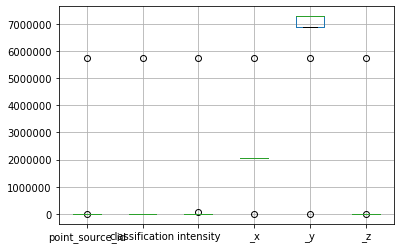

In [14]:
df_las.describe().boxplot()

In [15]:
from geopandas import GeoDataFrame
from shapely.geometry import Point, LineString

### Zip the coordinates into a point object and convert to a GeoDataFrame
#geometry = [Point(xy) for xy in zip(df_las['_x'], df_las['_y']]
#df_las = GeoDataFrame(df, geometry=geometry)

### Aggregate these points with the GroupBy
#df_las = df_las.groupby(['entity_id'])['geometry'].apply(lambda x: LineString(x.tolist()))
#df_las = GeoDataFrame(df_las, geometry='geometry')

## Fichier LAMPADAIRES

In [19]:
# READING THE SHAPE FILES

#import pyshp
import fiona
import shapely    #import shapefile
from shapely.geometry import Point, LineString
import geopandas as gpd

#file_3a = path + "odata3d_lidar/odata3d_lidar.shp"
file_3 = path + "datasets/shapes/lampadaire.shp"
file_3b = path + "datasets/shapes/poteaux.shp"

df_shape = gpd.read_file(file_3)
df_shape.head()

,gid,ident_gy,code_preci,date_leve,auteur,date_reco,angle_g,z_sol,date_creat,date_maj,geometry
0,151,69204241.0,rattache,1998/09/01 00:00:00.000,Muller C,2017/10/23 00:00:00.000,-42.4,158.56,2014/01/18 13:58:37.000,2018/02/12 14:08:52.000,POINT (2046319.603 7283270.659)
1,152,69204199.0,rattache,1998/09/01 00:00:00.000,Muller C,2017/10/23 00:00:00.000,-57.6,157.94,2014/01/18 13:58:37.000,2018/02/12 14:09:00.000,POINT (2045855.457 7283330.024)
2,153,69204198.0,rattache,1998/09/01 00:00:00.000,Muller C,2017/10/23 00:00:00.000,0.0,160.34,2014/01/18 13:58:37.000,2018/02/12 14:09:00.000,POINT (2046065.952 7283614.279)
3,154,69204197.0,rattache,1998/09/01 00:00:00.000,Muller C,2017/10/23 00:00:00.000,-58.9,157.95,2014/01/18 13:58:37.000,2018/02/12 14:09:00.000,POINT (2046062.432 7283583.205)
4,155,69204071.0,rattache,1998/09/01 00:00:00.000,Muller C,2017/10/23 00:00:00.000,-163.4,149.73,2014/01/18 13:58:37.000,2018/02/12 14:09:24.000,POINT (2045854.604 7282886.637)


In [21]:
# Extract the X,Y values
df_shape['x'],df_shape['y'] = df_shape['geometry'].x,df_shape['geometry'].y
#df_shape['zone']

In [22]:
df_shape.head(3)

,gid,ident_gy,code_preci,date_leve,auteur,date_reco,angle_g,z_sol,date_creat,date_maj,geometry,x,y
0,151,69204241.0,rattache,1998/09/01 00:00:00.000,Muller C,2017/10/23 00:00:00.000,-42.4,158.56,2014/01/18 13:58:37.000,2018/02/12 14:08:52.000,POINT (2046319.603 7283270.659),2046319.603,7283270.659
1,152,69204199.0,rattache,1998/09/01 00:00:00.000,Muller C,2017/10/23 00:00:00.000,-57.6,157.94,2014/01/18 13:58:37.000,2018/02/12 14:09:00.000,POINT (2045855.457 7283330.024),2045855.457,7283330.024
2,153,69204198.0,rattache,1998/09/01 00:00:00.000,Muller C,2017/10/23 00:00:00.000,0.0,160.34,2014/01/18 13:58:37.000,2018/02/12 14:09:00.000,POINT (2046065.952 7283614.279),2046065.952,7283614.279


In [23]:
print(np.sum(df_shape.isna()))
df_shape.describe()

gid               0
ident_gy      12712
code_preci      487
date_leve       485
auteur           36
date_reco       481
angle_g           0
z_sol             8
date_creat        0
date_maj          0
geometry          0
x                 0
y                 0
dtype: int64


,gid,ident_gy,angle_g,z_sol,x,y
count,71980.000000,5.926800e+04,71980.000000,71972.000000,7.198000e+04,7.198000e+04
mean,41482.085468,6.844466e+07,-86.263138,143.013568,2.048694e+06,7.274929e+06
std,24846.487953,1.490377e+07,104.652849,5.864989,3.085854e+03,4.802390e+03
min,3.000000,3.379849e+07,-270.000000,0.000000,2.035425e+06,7.260641e+06
25%,19959.750000,6.737697e+07,-177.000000,139.660000,2.046733e+06,7.271762e+06
50%,40890.500000,6.768530e+07,-82.400000,142.230000,2.048779e+06,7.275225e+06
75%,61520.250000,6.798298e+07,0.000000,145.722500,2.051030e+06,7.278078e+06
max,90126.000000,4.027416e+08,90.000000,202.870000,2.056636e+06,7.287129e+06


### Trouve les lampadaires de la dalle

In [24]:
# effet de bord ... ==> rajouter un offset ?
off = 10 
# df_las.columns
dalle_bord = [df_las['_x'].min()-off, df_las['_y'].min()-off,df_las['_x'].max()+off, df_las['_y'].max()+off]
print(dalle_bord)

print(df_shape.shape)
df_lamp_dalle = df_shape[(df_shape['x'] > dalle_bord[0]) & (df_shape['x'] < dalle_bord[2]) &
                         (df_shape['y'] > dalle_bord[1]) & (df_shape['x'] < dalle_bord[3]) ]
df_lamp_dalle.shape


[2049990.0, 7274490.0, 2050509.99, 7275009.99]
(71980, 13)


(2917, 13)

## rattachement des deux jeux de données

In [ ]:
start = datetime.now()
start0 = datetime.now()
# merge TROP BRUTAL 
df3 = df_lamp_dalle.assign(key=1).merge(df_las.assign(key=1), how='outer', on='key').drop('key', axis=1)
end0 = datetime.now()
print("Temps de merge :    {}" .format(end0-start0))
# comparaison
#df3['Dist_D_hav'] = 1000 * dist_hav(df3['Long'], df3['Lat'], df3['Start_Long'], df3['Start_Lat'])
df3['Dist_euc'] = dist_euc(df3['_x'], df3['_y'], df3['x'], df3['y'])
end = datetime.now()
print("Total execution en: {}" .format(end-start))

# D < 1000 ==    518 valeurs
# D <  100 ==     20 valeurs
df4 = df3[(df3['Dist_euc'] < 100) ]    

In [ ]:
print(df3.shape, df4.shape)

In [ ]:
df3.describe()

In [37]:
df4.describe()

,gid,ident_gy,angle_g,z_sol,x,y,point_source_id,classification,intensity,_x,_y,_z,R,G,B,return,number of returns,Dist_euc
count,20.0,20.0,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,20.0,20.0,20.000000,2.000000e+01,2.000000e+01,20.00000,0.0,0.0,0.0,20.000000,20.00000,20.000000
mean,7777.0,69154663.0,-1.238000e+02,1.396200e+02,2.050015e+06,7.274679e+06,86.0,0.0,147.400000,2.050015e+06,7.274679e+06,140.99800,NaN,NaN,NaN,1.050000,1.35000,50.663827
std,0.0,0.0,2.916006e-14,2.916006e-14,2.388792e-10,9.555168e-10,0.0,0.0,155.878293,2.809851e-01,3.895730e-01,1.21907,NaN,NaN,NaN,0.223607,0.48936,28.000904
min,7777.0,69154663.0,-1.238000e+02,1.396200e+02,2.050015e+06,7.274679e+06,86.0,0.0,11.000000,2.050014e+06,7.274678e+06,139.71000,NaN,NaN,NaN,1.000000,1.00000,4.202245
25%,7777.0,69154663.0,-1.238000e+02,1.396200e+02,2.050015e+06,7.274679e+06,86.0,0.0,80.750000,2.050014e+06,7.274679e+06,140.30750,NaN,NaN,NaN,1.000000,1.00000,26.874082
50%,7777.0,69154663.0,-1.238000e+02,1.396200e+02,2.050015e+06,7.274679e+06,86.0,0.0,125.000000,2.050015e+06,7.274679e+06,140.51000,NaN,NaN,NaN,1.000000,1.00000,58.782338
75%,7777.0,69154663.0,-1.238000e+02,1.396200e+02,2.050015e+06,7.274679e+06,86.0,0.0,152.750000,2.050015e+06,7.274679e+06,141.18250,NaN,NaN,NaN,1.000000,2.00000,67.187754
max,7777.0,69154663.0,-1.238000e+02,1.396200e+02,2.050015e+06,7.274679e+06,86.0,0.0,773.000000,2.050015e+06,7.274679e+06,143.25000,NaN,NaN,NaN,2.000000,2.00000,99.581202


In [51]:
#df3 = df_lamp_dalle.assign(key=1).merge(df_las.assign(key=1), how='outer', on='key').drop('key', axis=1)


df3b = gpd.sjoin(df_lamp_dalle, df_las, how='left', op='intersects', lsuffix='left', rsuffix='right')

/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(epsg:3948 != None)
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [52]:
print(df3b.shape)
df3b.describe()

(476, 26)


,gid,ident_gy,angle_g,z_sol,x,y,index_right,point_source_id,classification,intensity,_x,_y,_z,R,G,B,return,number of returns
count,476.000000,4.080000e+02,476.000000,476.000000,4.760000e+02,4.760000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,38307.844538,6.779734e+07,-95.776050,141.364643,2.050041e+06,7.278924e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,24877.427116,4.624625e+05,106.683041,2.112712,3.039179e+01,2.235536e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,667.000000,6.711284e+07,-269.100000,136.040000,2.049990e+06,7.274650e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,16536.750000,6.730805e+07,-184.200000,139.825000,2.050014e+06,7.277726e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,32505.000000,6.781700e+07,-81.950000,141.790000,2.050043e+06,7.278778e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,61387.500000,6.797369e+07,0.000000,143.130000,2.050068e+06,7.280442e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,87688.000000,6.932844e+07,89.300000,144.620000,2.050092e+06,7.283829e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    a                 geometry
0  11  POINT (1.00000 2.00000)
1  22  POINT (5.00000 6.00000)
    a                                           geometry
0  11  POLYGON ((3.00000 2.00000, 2.99037 1.80397, 2....
1  22  POLYGON ((7.00000 6.00000, 6.99037 5.80397, 6....


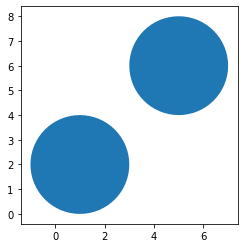

In [60]:
p1 = Point((1,2))
p2 = Point((5,6))
df = pd.DataFrame({'a': [11,22]})
gdf = gpd.GeoDataFrame(df, geometry = [p1,p2])
print(gdf)
gdf['geometry'] = gdf.geometry.buffer(2)
print(gdf)
_= gdf.plot()

In [ ]:
# sur LAPTOP
path_Num = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DallesNumPoints5m/"
path_Eca = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DallesEcartZ5m/"
path_Num = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DallesPosition5m/"



